<a href="https://colab.research.google.com/github/atfan7/Python-Libraries/blob/main/Videogames_sales_Tencent_Kaggle_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Videogame_Tencent Dataset analysis with visualization

In [ ]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166 -O final_vg.csv

--2023-12-24 07:20:24--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/021/299/original/final_vg1_-_final_vg_%281%29.csv?1670840166
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 13.224.9.129, 13.224.9.24, 13.224.9.103, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|13.224.9.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2041483 (1.9M) [text/plain]
Saving to: ‘final_vg.csv’

final_vg.csv        100%[===================>]   1.95M  1.28MB/s    in 1.5s    

2023-12-24 07:20:27 (1.28 MB/s) - ‘final_vg.csv’ saved [2041483/2041483]



In [ ]:
data = pd.read_csv('final_vg.csv')

# Univariate data analyis

# Q1: Count of each genre and number of genres

In [ ]:
cat_counts =data['Genre'].value_counts()

cat_counts

Action          3316
Sports          2400
Misc            1739
Role-Playing    1488
Shooter         1310
Adventure       1286
Racing          1249
Platform         886
Simulation       867
Fighting         848
Strategy         681
Puzzle           582
Name: Genre, dtype: int64

<BarContainer object of 12 artists>

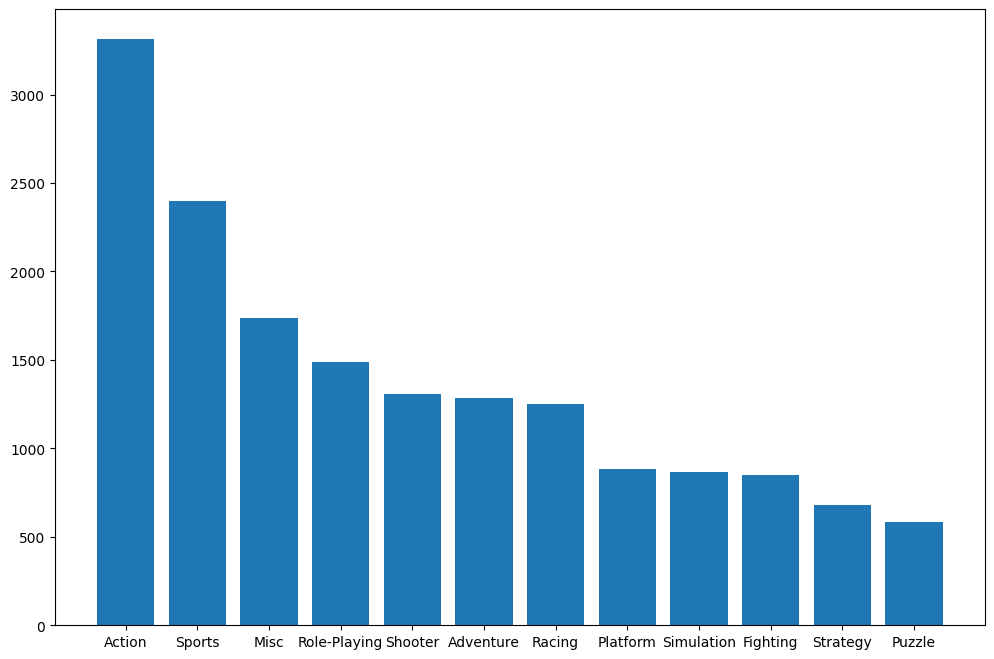

In [ ]:
x_bar=cat_counts.index

plt.figure(figsize=(12,8))
y_bar =cat_counts
plt.bar(x_bar,y_bar)

rotate indexes by 45 degreeand give labels

<BarContainer object of 12 artists>

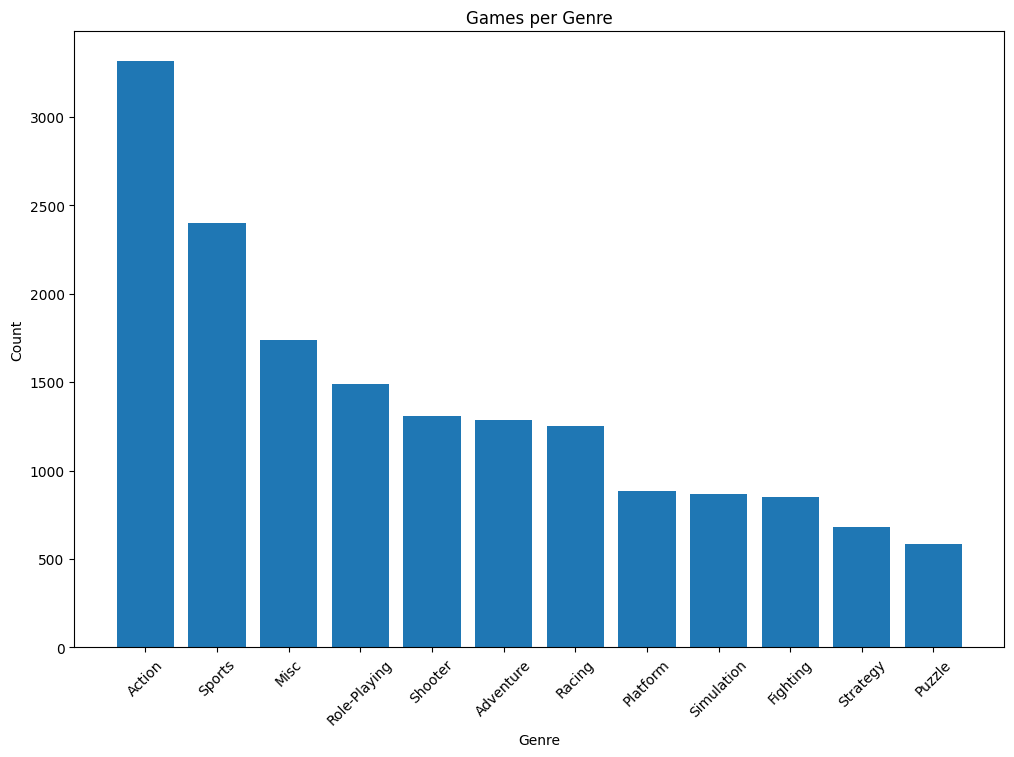

In [ ]:
x_bar=cat_counts.index

plt.figure(figsize=(12,8))
y_bar =cat_counts

plt.title('Games per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')

plt.xticks(rotation =45)
plt.bar(x_bar,y_bar)

# Q2 : Populrity of video games over the years

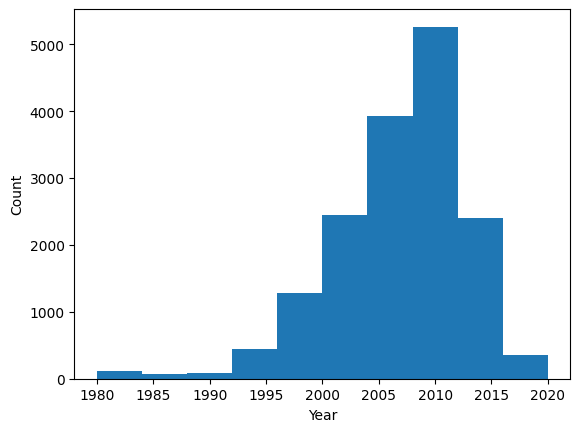

In [ ]:
plt.hist(data['Year'])
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

using seaborn (automatic labels)

<Axes: xlabel='Year', ylabel='Count'>

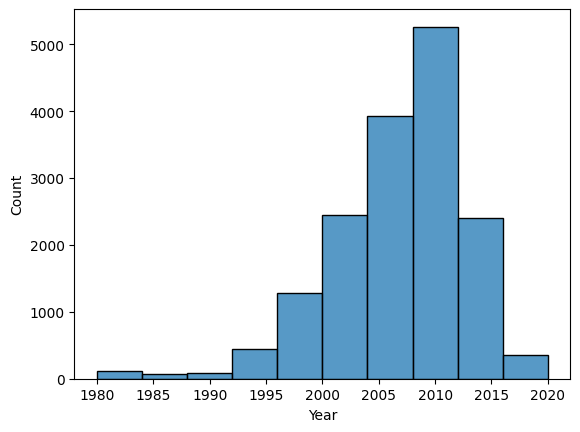

In [ ]:
sns.histplot(data['Year'],bins =10)

<Axes: xlabel='Year', ylabel='Density'>

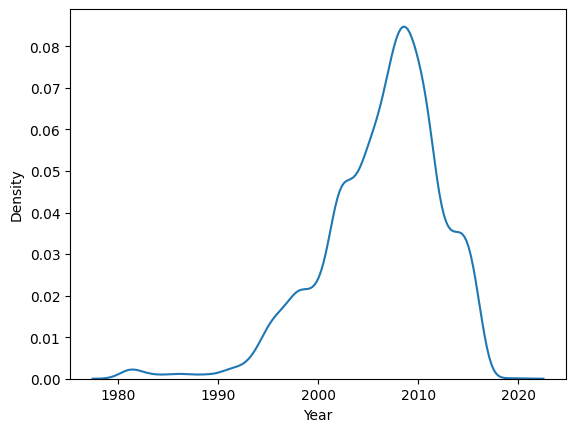

In [ ]:
sns.kdeplot(data['Year'])

# Q3: Box plot of global sales

<Axes: ylabel='Global_Sales'>

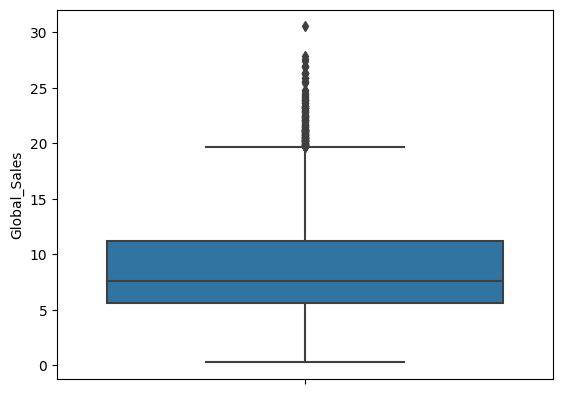

In [ ]:
sns.boxplot(y=data['Global_Sales'])

# **Bi-Variate Data Analysis **

Part 1 : Continous- Continous

# Q1: Find the sales trend for ice-hockey in NA across years

In [ ]:
ih=data.loc[ data['Name']=='Ice Hockey' ]

ih.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6073,639,Ice Hockey,NES,1988.0,Sports,Nintendo,0.44,3.860566,4.751539,2.004268,15.855389
6074,4027,Ice Hockey,2600,1980.0,Sports,Activision,0.39,1.493442,2.741701,0.394830,4.956249
6075,4149,Ice Hockey,2600,1991.0,Sports,Activision,0.61,0.020000,0.000000,0.010000,0.470000
6076,4149,Ice Hockey,2600,1992.0,Sports,Activision,0.65,0.020000,0.000000,0.010000,0.470000
6077,4149,Ice Hockey,SNES,1993.0,Sports,Activision,0.68,0.020000,0.000000,0.010000,0.470000


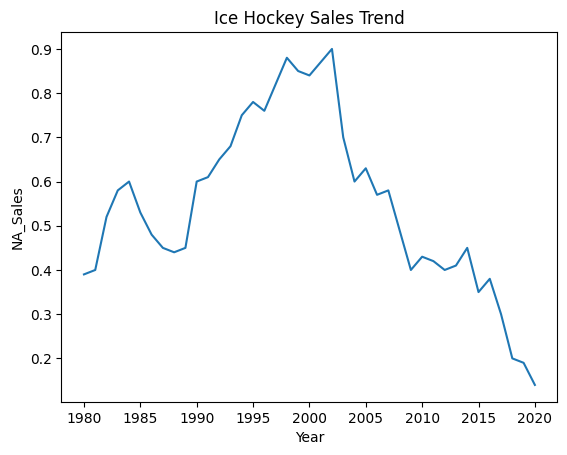

In [ ]:
plt.title ('Ice Hockey Sales Trend')
sns.lineplot(x='Year', y='NA_Sales',data=ih)
plt.show ()

add colour

<Axes: xlabel='Year', ylabel='NA_Sales'>

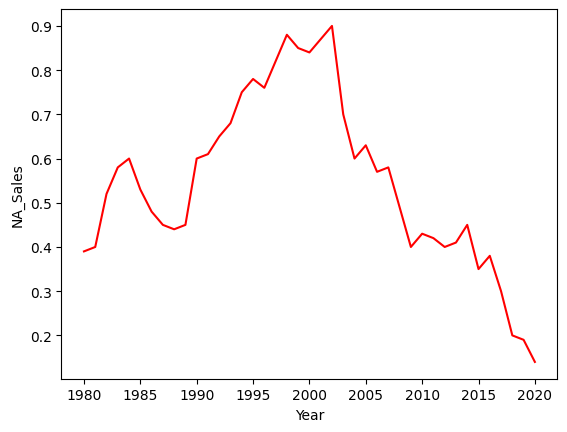

In [ ]:
sns.lineplot(x='Year', y='NA_Sales',data=ih,color='red')

Trend from 1990 to 2005 (limiting the data of years)

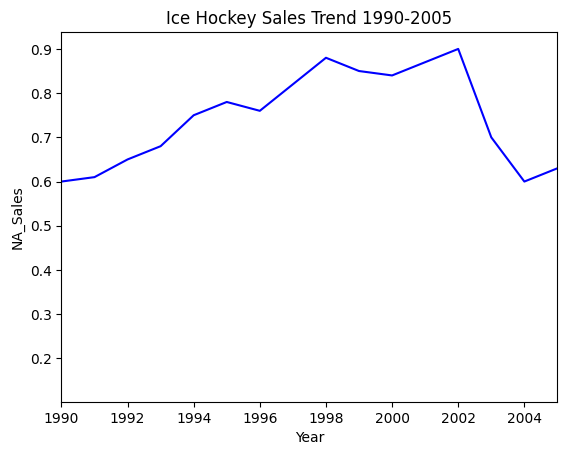

In [ ]:
plt.title ('Ice Hockey Sales Trend 1990-2005')
sns.lineplot(x='Year', y='NA_Sales',data=ih,color='blue')
plt.xlim(left =1990, right =2005)
plt.show ()

# Q2 :Compare line plots for different categories

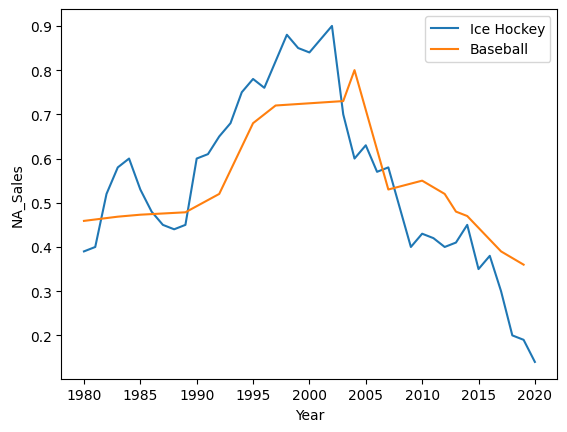

In [ ]:
ih=data.loc[ data['Name']=='Ice Hockey' ]
baseball = data.loc [data['Name']=='Baseball']

sns.lineplot(x='Year', y='NA_Sales',data=ih,label='Ice Hockey')
sns.lineplot(x='Year', y='NA_Sales',data=baseball,label='Baseball')
plt.show()

# Q3: Scatter plot of Global Sales Vs Rank

<Axes: xlabel='Rank', ylabel='Global_Sales'>

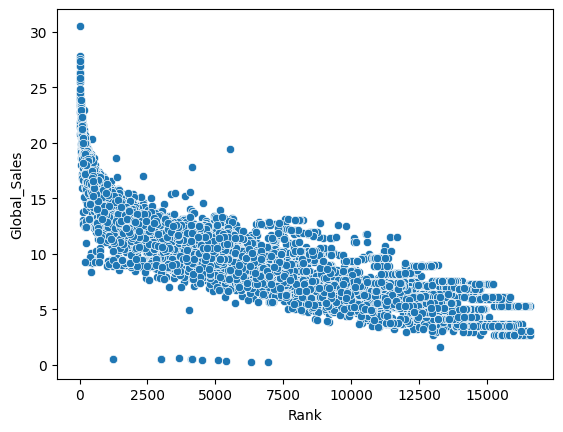

In [ ]:
sns.scatterplot(x='Rank',y='Global_Sales',data=data)

Part 2: Categorical -Categorical

In [34]:
top3_gen= data['Genre'].value_counts().index[:3]
top3_pub= data['Publisher'].value_counts().index[:3]
top3_plt= data['Platform'].value_counts().index[:3]

In [35]:
top3_data = data.loc [ (data['Genre'].isin(top3_gen)) & (data['Publisher'].isin(top3_pub)) & (data['Platform'].isin(top3_plt) )    ]

Q1: Comapre the Top 3 Platforms the publishers use

<Axes: xlabel='Publisher', ylabel='count'>

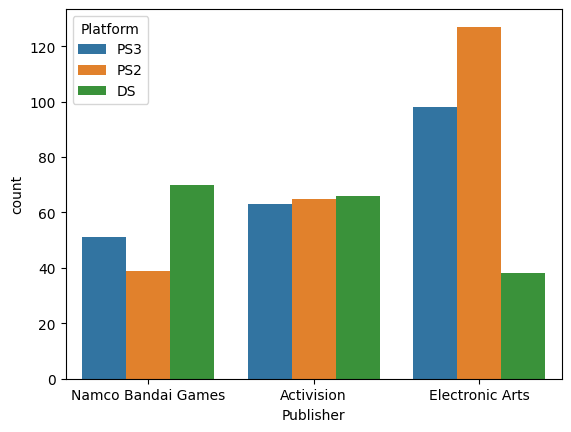

In [36]:
sns.countplot(x='Publisher',data=top3_data,hue='Platform')

Part 3: Continous -Catagorical

# Q1: Find the distribution of sales for TOP 3 publishers  

<Axes: xlabel='Genre', ylabel='Global_Sales'>

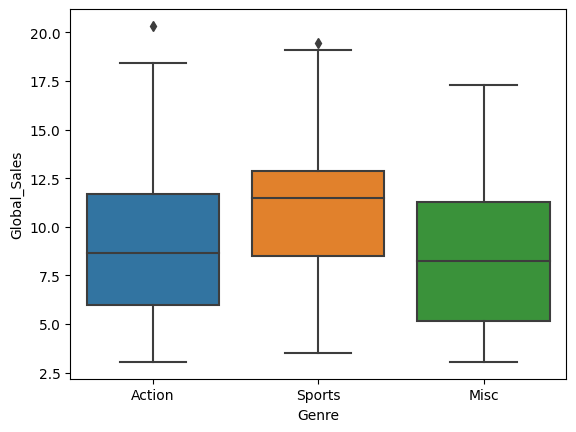

In [37]:
sns.boxplot(x='Genre',y='Global_Sales',data=top3_data)

# Q2: Count of sales by genre -mean

<Axes: xlabel='Genre', ylabel='Global_Sales'>

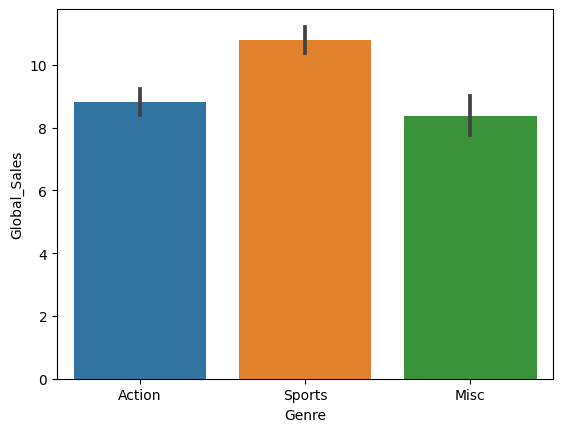

In [38]:
sns.barplot(x='Genre', y='Global_Sales',data=top3_data)

# Sum

<Axes: xlabel='Genre', ylabel='Global_Sales'>

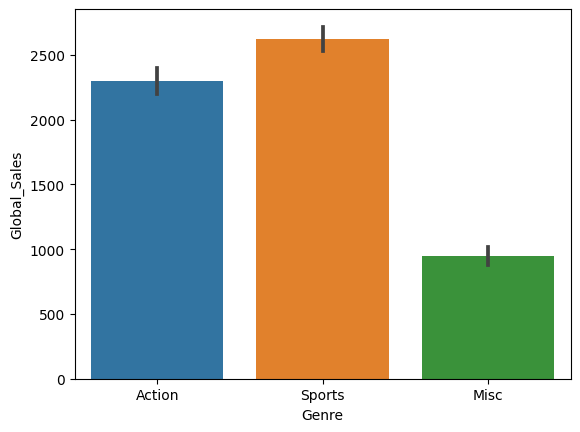

In [39]:
sns.barplot(x='Genre', y='Global_Sales',data=top3_data,estimator =np.sum)

# Max

<Axes: xlabel='Genre', ylabel='Global_Sales'>

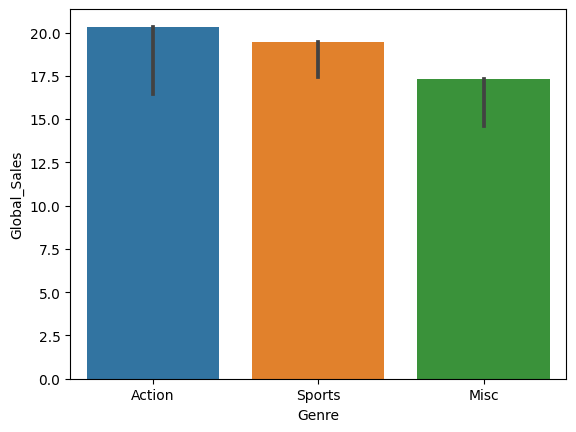

In [40]:
sns.barplot(x='Genre', y='Global_Sales',data=top3_data,estimator =np.max)

# SUB-PLOTS

Part 1

<Axes: xlabel='EU_Sales', ylabel='JP_Sales'>

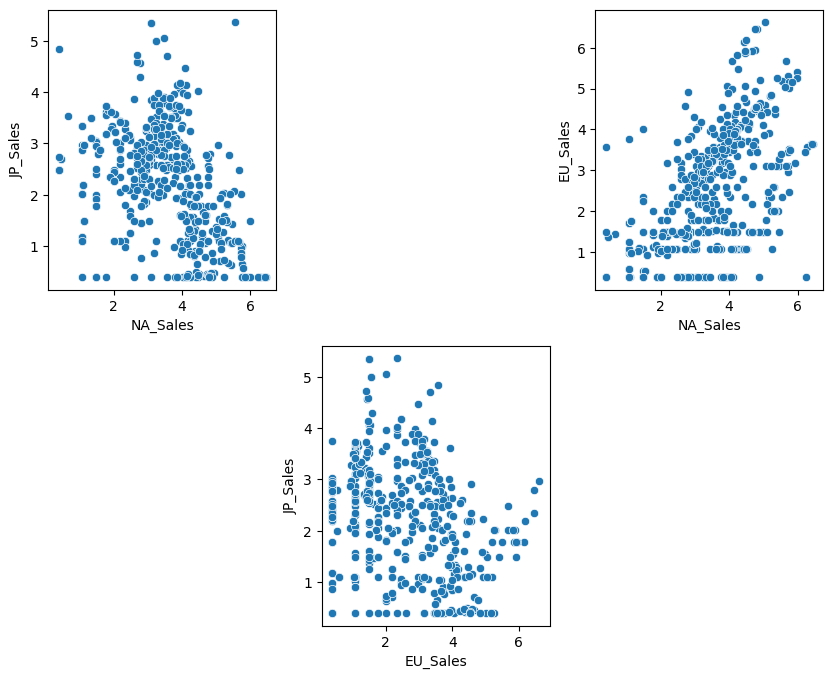

In [42]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.scatterplot(x='NA_Sales',y='JP_Sales',data=top3_data)

plt.subplot(2,3,3)
sns.scatterplot(x='NA_Sales',y='EU_Sales',data=top3_data)

plt.subplot(2,3,5)
sns.scatterplot(x='EU_Sales',y='JP_Sales',data=top3_data)

Part 2

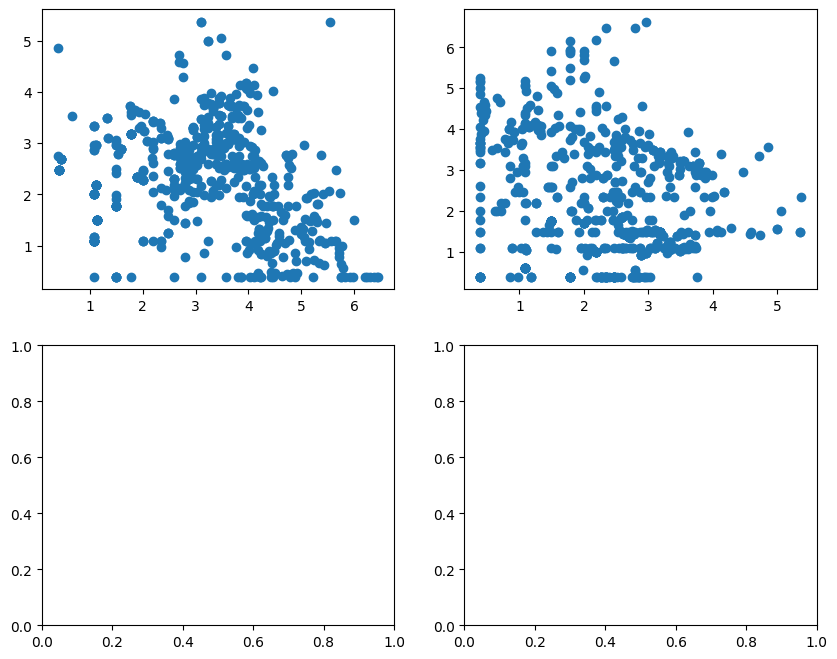

In [44]:
fig , ax =plt.subplots(2,2,figsize=(10,8))

ax[0][0].scatter(top3_data['NA_Sales'],top3_data['JP_Sales'])
ax[0][1].scatter(top3_data['JP_Sales'],top3_data['EU_Sales'])

Part 3-Mutiple figures

<Axes: xlabel='Publisher', ylabel='count'>

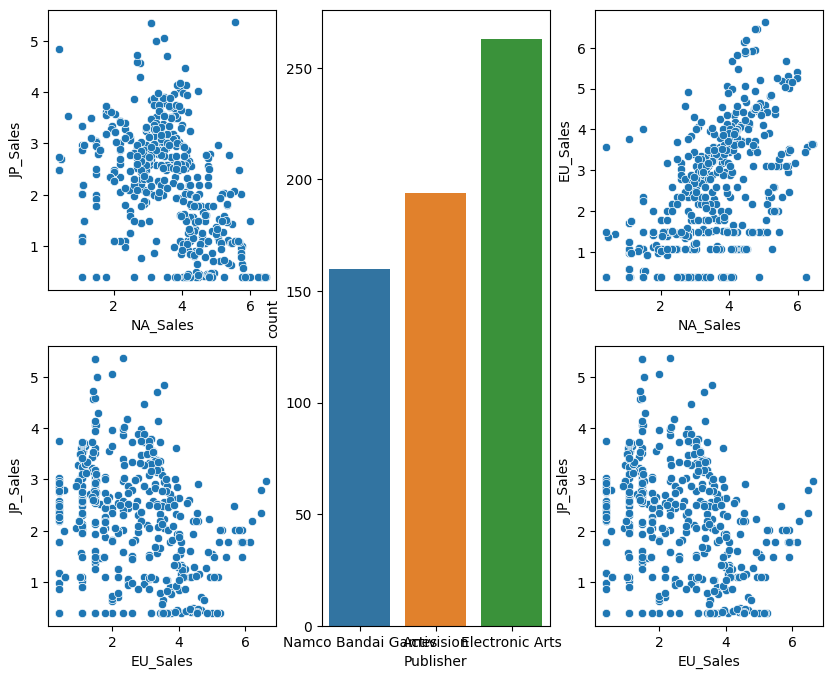

In [50]:
fig=plt.figure(figsize=(10,8))

plt.subplot(2,3,1)
sns.scatterplot(x='NA_Sales',y='JP_Sales',data=top3_data)

plt.subplot(2,3,3)
sns.scatterplot(x='NA_Sales',y='EU_Sales',data=top3_data)

plt.subplot(2,3,4)
sns.scatterplot(x='EU_Sales',y='JP_Sales',data=top3_data)

plt.subplot(2,3,6)
sns.scatterplot(x='EU_Sales',y='JP_Sales',data=top3_data)

plt.subplot(1,3,2)
sns.countplot(x='Publisher',data=top3_data)



# **Mutivariate Data analysis **

1) Numerical-Numerical -Categorical (N-N-C)

<Axes: xlabel='NA_Sales', ylabel='EU_Sales'>

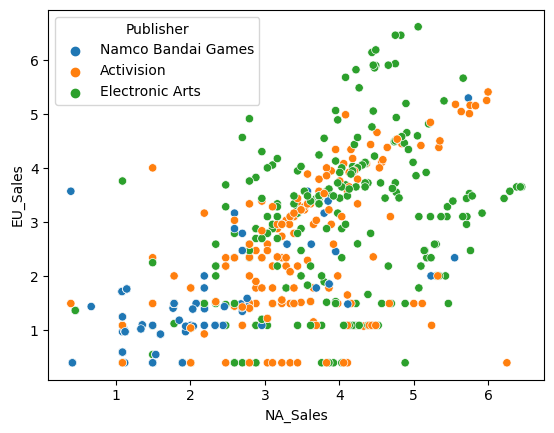

In [51]:
sns.scatterplot(x='NA_Sales',y='EU_Sales',data=top3_data,hue='Publisher')

2) Categorical-Categorical-Numerical (C-C-N)

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

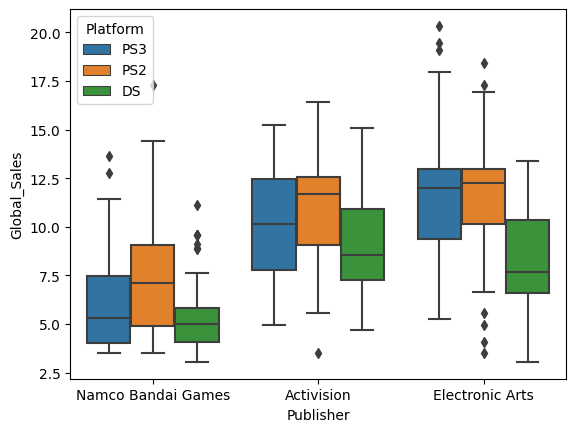

In [52]:
sns.boxplot(x='Publisher',y='Global_Sales',data=top3_data,hue='Platform')

<Axes: xlabel='Publisher', ylabel='Global_Sales'>

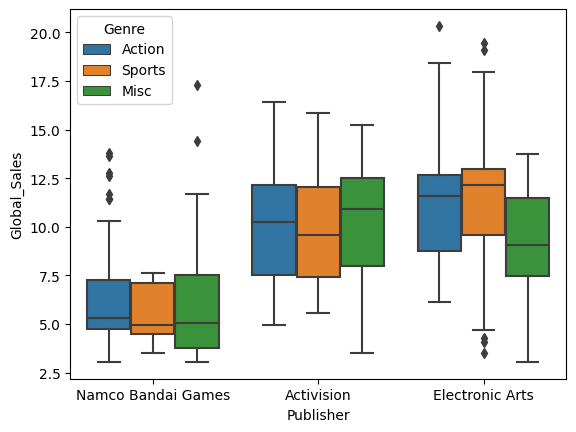

In [55]:
sns.boxplot(x='Publisher',y='Global_Sales',data=top3_data,hue='Genre')

3) Numerical-Numerical-Numerical (N-N-N)

<Axes: xlabel='NA_Sales', ylabel='JP_Sales'>

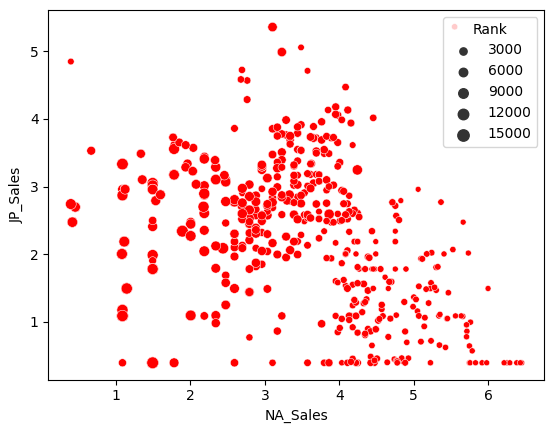

In [58]:
sns.scatterplot(x='NA_Sales',y='JP_Sales',data=top3_data,size='Rank',color='red')

# Joint Plots

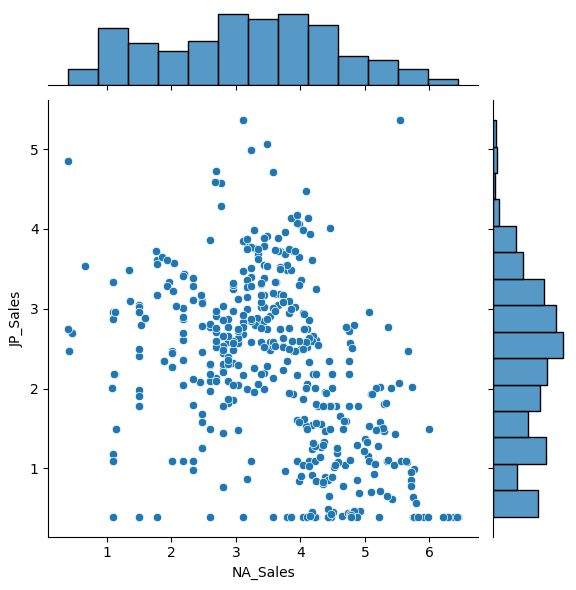

In [61]:
sns.jointplot(x='NA_Sales',y='JP_Sales',data=top3_data)

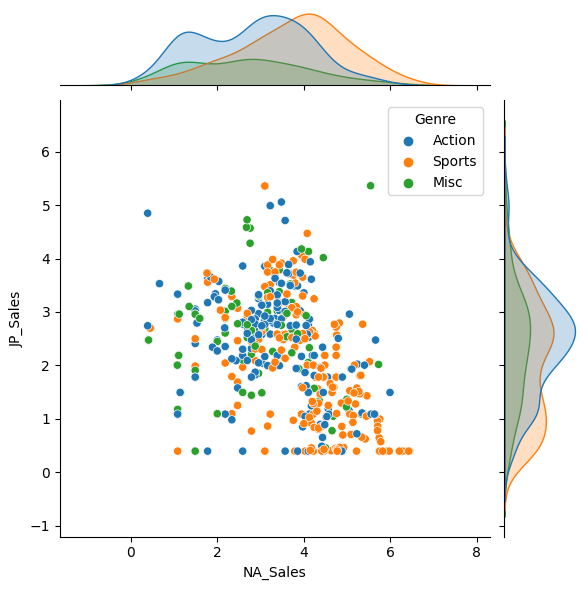

In [62]:
sns.jointplot(x='NA_Sales',y='JP_Sales',data=top3_data,hue ='Genre')

# Pair Plots

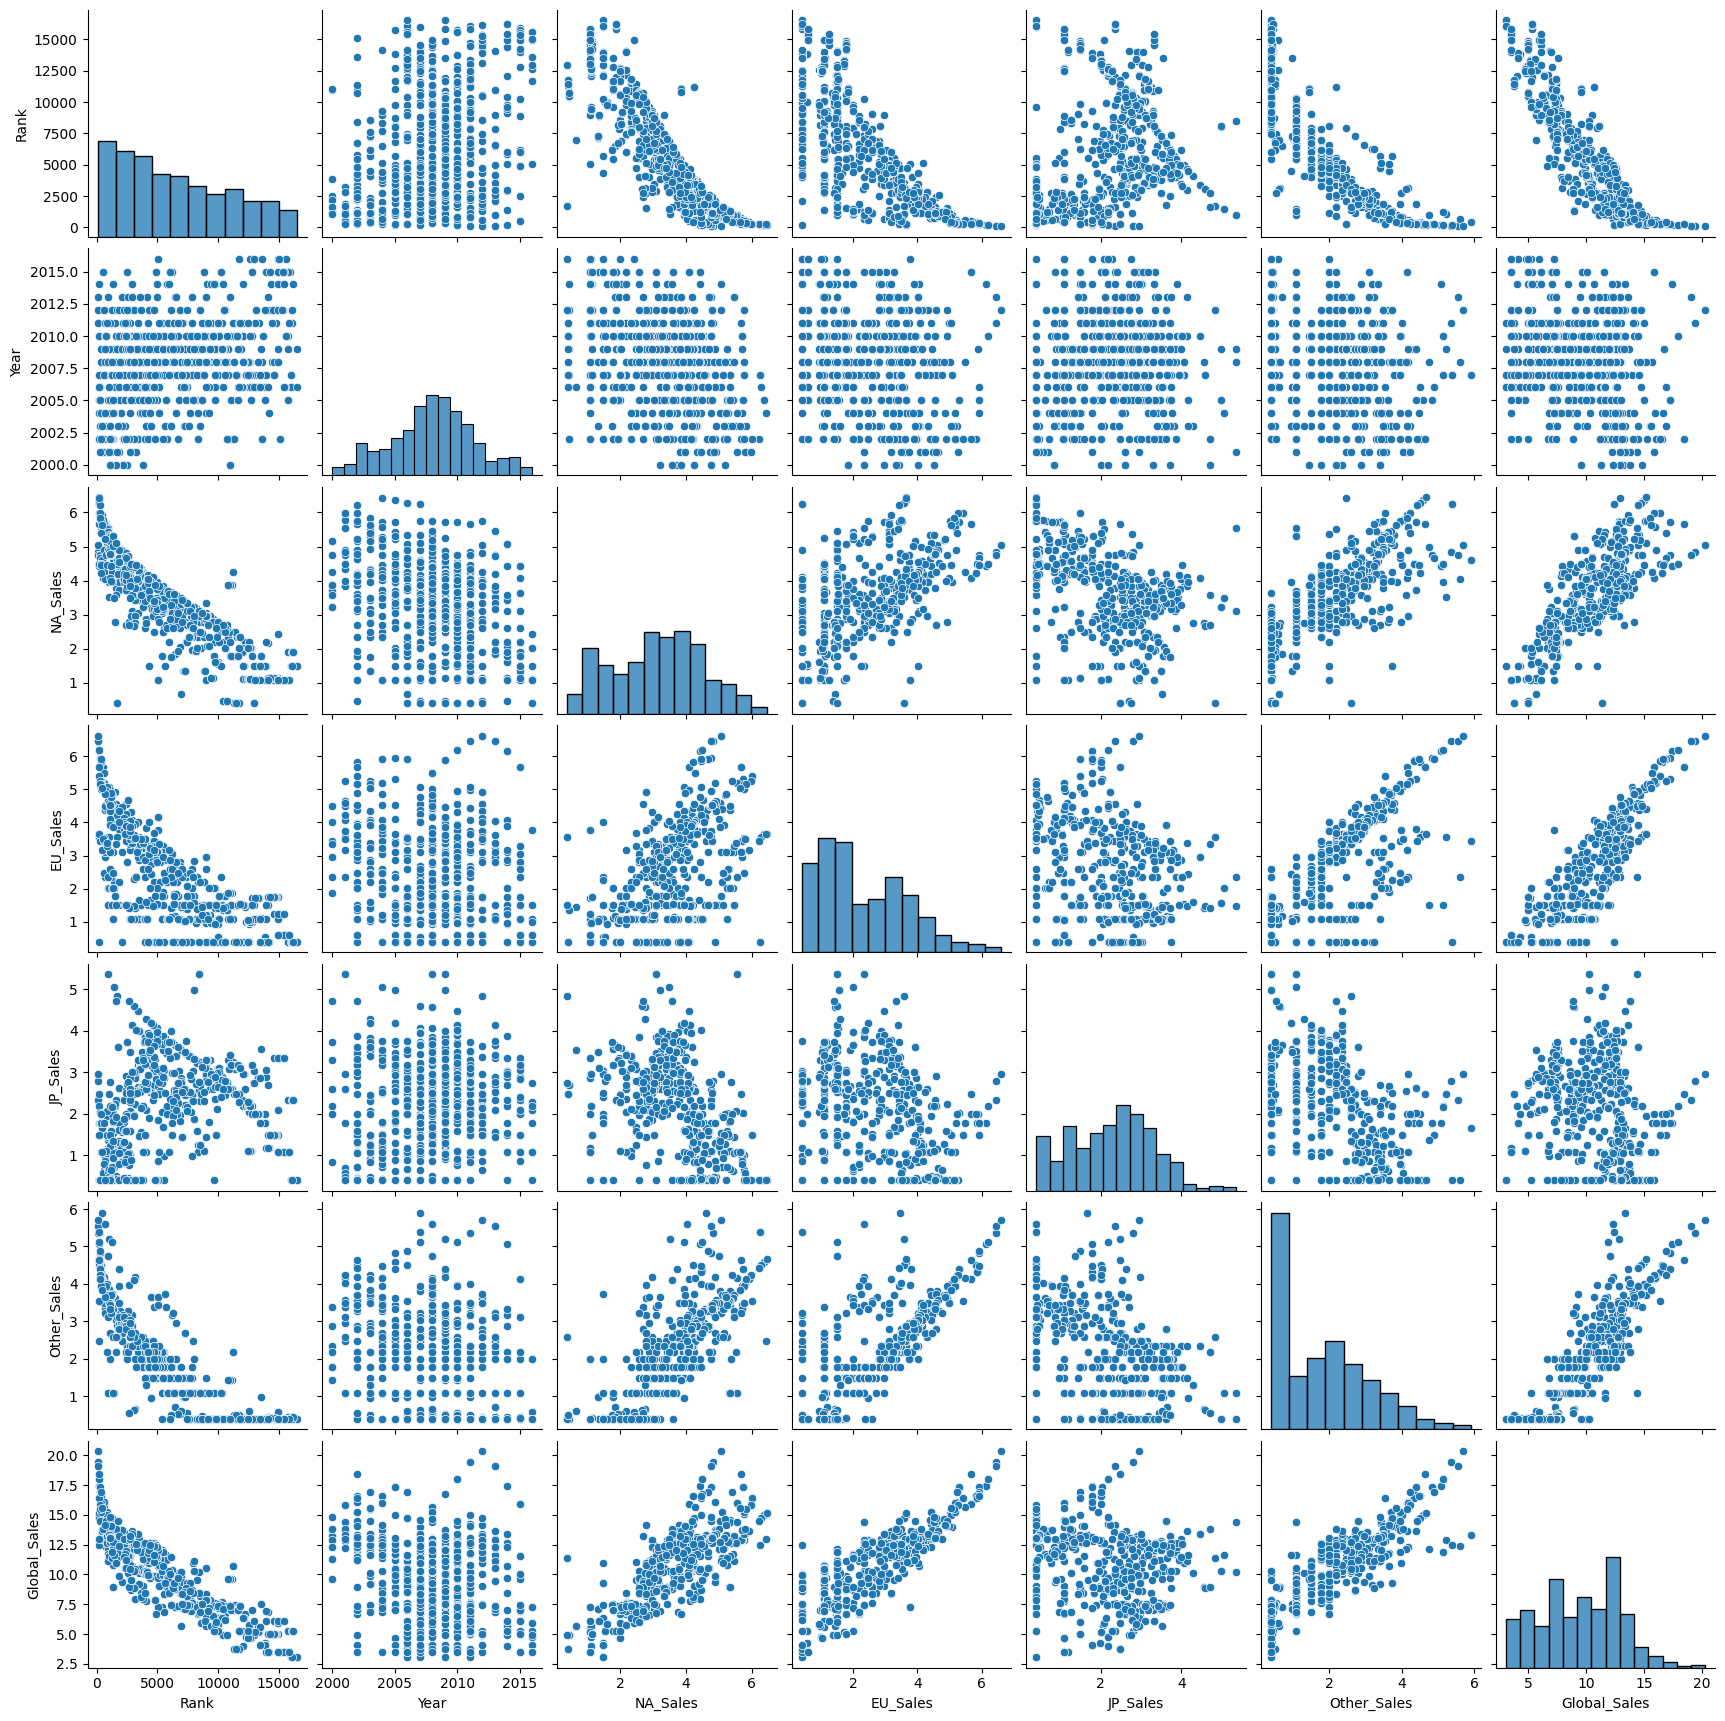

In [63]:
sns.pairplot(data=top3_data)

Correlation of values

In [64]:
top3_data.corr()

<ipython-input-64-c78d7a78d920>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  top3_data.corr()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.328705,-0.873726,-0.735711,0.115459,-0.857567,-0.911721
Year,0.328705,1.000000,-0.354256,-0.178026,0.055864,-0.239876,-0.280351
NA_Sales,-0.873726,-0.354256,1.000000,0.617483,-0.233315,0.794353,0.856300
EU_Sales,-0.735711,-0.178026,0.617483,1.000000,-0.208249,0.771105,0.864147
JP_Sales,0.115459,0.055864,-0.233315,-0.208249,1.000000,-0.355825,-0.014193
Other_Sales,-0.857567,-0.239876,0.794353,0.771105,-0.355825,1.000000,0.878816
Global_Sales,-0.911721,-0.280351,0.856300,0.864147,-0.014193,0.878816,1.000000


<ipython-input-66-40f1369df891>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(top3_data.corr(),cmap='Blues',annot=True)


<Axes: >

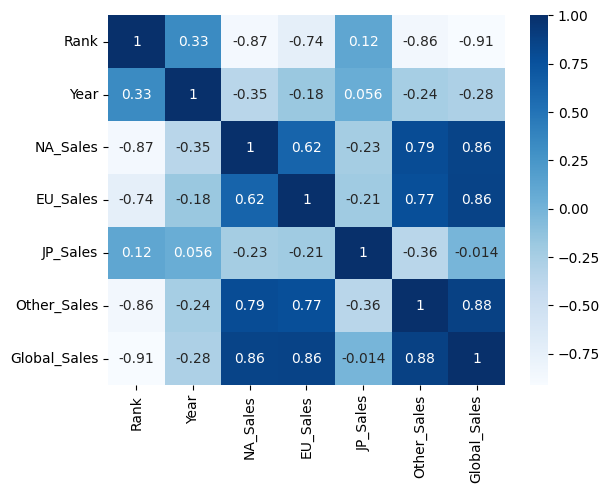

In [66]:
sns.heatmap(top3_data.corr(),cmap='Blues',annot=True)